<a href="https://colab.research.google.com/github/Ersel26/urban-sound-classification/blob/main/urban_sounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from skimage import color
import random

In [2]:
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = filename.split("-")[1]
        labels.append(label)

        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))
            img = color.rgb2gray(img)

            images.append(img)
    return (images, labels)

In [3]:
fold_path = "/content/drive/MyDrive/Colab Notebooks/urban sounds/spectrograms"

fold0_imgs, fold0_labels = load_images(fold_path + "/0")
fold1_imgs, fold1_labels = load_images(fold_path + "/1")
fold2_imgs, fold2_labels = load_images(fold_path + "/2")
fold3_imgs, fold3_labels = load_images(fold_path + "/3")
fold4_imgs, fold4_labels = load_images(fold_path + "/4")
fold5_imgs, fold5_labels = load_images(fold_path + "/5")
fold6_imgs, fold6_labels = load_images(fold_path + "/6")
fold7_imgs, fold7_labels = load_images(fold_path + "/7")
fold8_imgs, fold8_labels = load_images(fold_path + "/8")
fold9_imgs, fold9_labels = load_images(fold_path + "/9")

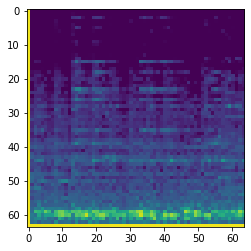

(64, 64)


In [4]:
img = fold9_imgs[111]

plt.imshow(img)
plt.show()

print(img.shape)

In [5]:
imgs = np.concatenate((fold0_imgs, 
                       fold1_imgs, 
                       fold2_imgs, 
                       fold3_imgs, 
                       fold4_imgs, 
                       fold5_imgs, 
                       fold6_imgs, 
                       fold7_imgs, 
                       fold8_imgs, 
                       fold9_imgs,), axis = 0)

labels = np.concatenate((fold0_labels,
                         fold1_labels,
                         fold2_labels,
                         fold3_labels,
                         fold4_labels,
                         fold5_labels,
                         fold6_labels,
                         fold7_labels,
                         fold8_labels,
                         fold9_labels,), axis = 0)


In [36]:
data = []
for i in range(len(imgs)):
    data.append([imgs[i], int(labels[i])])

random.seed(111)
random.shuffle(data)

data[0]

[array([[0.97647059, 0.00333333, 0.12984431, ..., 0.00333333, 0.00333333,
         0.00333333],
        [0.97647059, 0.26210941, 0.33366784, ..., 0.00333333, 0.00333333,
         0.00333333],
        [0.97647059, 0.17533569, 0.29813373, ..., 0.00333333, 0.00333333,
         0.00333333],
        ...,
        [0.97647059, 0.44023294, 0.64541725, ..., 0.00333333, 0.00333333,
         0.00333333],
        [0.97647059, 0.54007608, 0.87415804, ..., 0.14932275, 0.13930078,
         0.14709059],
        [0.99607843, 0.97647059, 0.97647059, ..., 0.97647059, 0.97647059,
         0.97647059]]), 6]

In [37]:
shuf_imgs = []
shuf_labels = []

for i in range(len(data)):
  shuf_imgs.append(data[i][0])
  shuf_labels.append(data[i][1])

In [40]:
X_train = np.array(shuf_imgs[:int(0.7*len(shuf_imgs))])
X_val = np.array(shuf_imgs[int(0.7*len(shuf_imgs)):int(0.85*len(shuf_imgs))])
X_test = np.array(shuf_imgs[int(0.85*len(shuf_imgs)):])

y_train = np.array(shuf_labels[:int(0.7*len(shuf_labels))])
y_val = np.array(shuf_labels[int(0.7*len(shuf_labels)):int(0.85*len(shuf_labels))])
y_test = np.array(shuf_labels[int(0.85*len(shuf_labels)):])

In [42]:
np.save("X_train", X_train)
np.save("X_val", X_val)
np.save("X_test", X_test)
np.save("y_train", y_train)
np.save("y_val", y_val)
np.save("y_test", y_test)

In [43]:
X_train[111].shape

(64, 64)

In [44]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

lb.fit_transform(y_train)
lb.transform(y_val)

array([9, 0, 6, ..., 2, 4, 5])

In [45]:
CNNmodel = tf.keras.Sequential()

In [46]:
CNNmodel.add(tf.keras.layers.Conv2D(
    filters = 32,
    kernel_size = (3,3),
    strides = (1,1),
    padding = "same",
    activation = "relu",
    input_shape = (64, 64, 1)
))

CNNmodel.add(tf.keras.layers.MaxPooling2D(
    pool_size = (2,2)
))

In [47]:
CNNmodel.add(tf.keras.layers.Conv2D(
    filters = 64,
    kernel_size = (3,3),
    strides = (1,1),
    padding = "same",
    activation = "relu",
))

CNNmodel.add(tf.keras.layers.MaxPooling2D(
    pool_size = (2,2)
))

CNNmodel.add(tf.keras.layers.Conv2D(
    filters = 64,
    kernel_size = (3,3),
    strides = (1,1),
    padding = "same",
    activation = "relu",
))

In [48]:
CNNmodel.add(tf.keras.layers.Flatten())

In [49]:
CNNmodel.add(tf.keras.layers.Dense(
    64,
    activation = "relu",
))
CNNmodel.add(tf.keras.layers.Dropout(
    0.5
))


CNNmodel.add(tf.keras.layers.Dense(
    64,
    activation = "relu",
))
CNNmodel.add(tf.keras.layers.Dropout(
    0.5
))

In [50]:
CNNmodel.add(tf.keras.layers.Dense(
    10,
    activation = "softmax"
))

In [51]:
CNNmodel.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 5)

In [53]:
CNNmodel.fit(
    x = X_train,
    y = y_train,
    batch_size = 128,
    epochs = 25,
    validation_data = (X_val, y_val),
    callbacks = [early_stop]
)

Epoch 1/25
48/48 [==============================] - 47s 969ms/step - loss: 2.0798 - accuracy: 0.2330 - val_loss: 1.6852 - val_accuracy: 0.4206
Epoch 2/25
48/48 [==============================] - 45s 934ms/step - loss: 1.8079 - accuracy: 0.3431 - val_loss: 1.4270 - val_accuracy: 0.5290
Epoch 3/25
48/48 [==============================] - 44s 923ms/step - loss: 1.6003 - accuracy: 0.4280 - val_loss: 1.2496 - val_accuracy: 0.6221
Epoch 4/25
48/48 [==============================] - 44s 921ms/step - loss: 1.4356 - accuracy: 0.4972 - val_loss: 1.1074 - val_accuracy: 0.6588
Epoch 5/25
48/48 [==============================] - 46s 966ms/step - loss: 1.3075 - accuracy: 0.5425 - val_loss: 0.9597 - val_accuracy: 0.7130
Epoch 6/25
48/48 [==============================] - 44s 926ms/step - loss: 1.2168 - accuracy: 0.5867 - val_loss: 0.9087 - val_accuracy: 0.7290
Epoch 7/25
48/48 [==============================] - 45s 929ms/step - loss: 1.1020 - accuracy: 0.6237 - val_loss: 0.8004 - val_accuracy: 0.7603

In [54]:
CNNmodel.history.history

{'loss': [2.0798139572143555,
  1.8078713417053223,
  1.6002857685089111,
  1.4355928897857666,
  1.307497501373291,
  1.216825008392334,
  1.101955533027649,
  1.0328466892242432,
  0.9634150266647339,
  0.9072455167770386,
  0.8325881361961365,
  0.8213702440261841,
  0.7435098886489868,
  0.6970792412757874,
  0.6612384915351868,
  0.6440805792808533,
  0.5821624398231506,
  0.5668864846229553,
  0.5363048315048218,
  0.5158533453941345,
  0.5098674893379211,
  0.4765031933784485,
  0.484297513961792,
  0.429643452167511,
  0.4114018678665161],
 'accuracy': [0.2329842895269394,
  0.3430955410003662,
  0.4280104637145996,
  0.4972185790538788,
  0.5425392389297485,
  0.5867146849632263,
  0.6236910820007324,
  0.6536322236061096,
  0.6803010702133179,
  0.6969895362854004,
  0.7216950058937073,
  0.7293848395347595,
  0.7495091557502747,
  0.7676701545715332,
  0.777323305606842,
  0.7886125445365906,
  0.7984293103218079,
  0.807100772857666,
  0.8172447681427002,
  0.82117146253585

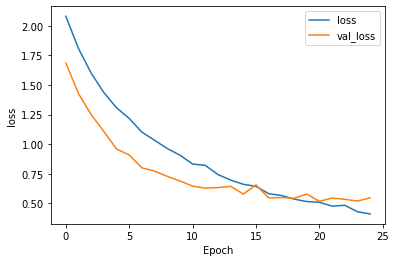

In [57]:
plt.plot(CNNmodel.history.history["loss"], label = "loss")
plt.plot(CNNmodel.history.history["val_loss"], label = "val_loss")

plt.xlabel("Epoch")
plt.ylabel("loss")

plt.legend()

plt.show()

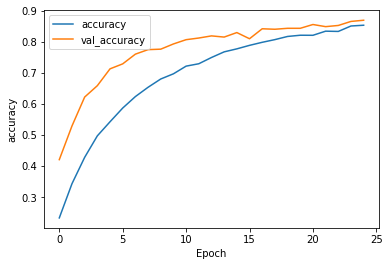

In [58]:
plt.plot(CNNmodel.history.history["accuracy"], label = "accuracy")
plt.plot(CNNmodel.history.history["val_accuracy"], label = "val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.legend()

plt.show()